In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## loading dataset

In [2]:
#load the iris dataset
dataset = pd.read_csv('iris.csv')  

X = dataset.iloc[:,3:-1].values
y = dataset.iloc[:,-1].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(X)
print(y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.1]
 [1.2 0.2]
 [1.3 0.2]
 [1.5 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

## split first 40 data points of each class into training set and remaining 10 points into test set

In [3]:
#Separate data into different classes
setosa_indices = np.where(y == 0)[0]
versicolor_indices = np.where(y == 1)[0]
virginica_indices = np.where(y == 2)[0]


X_train = np.concatenate((X[setosa_indices[:40]], X[versicolor_indices[:40]], X[virginica_indices[:40]]), axis = 0)
y_train = np.concatenate((y[setosa_indices[:40]], y[versicolor_indices[:40]], y[virginica_indices[:40]]), axis = 0)
X_test = np.concatenate((X[setosa_indices[40:]], X[versicolor_indices[40:]], X[virginica_indices[40:]]), axis = 0)
y_test = np.concatenate((y[setosa_indices[40:]], y[versicolor_indices[40:]], y[virginica_indices[40:]]), axis = 0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(120, 2)
(120,)
(30, 2)
(30,)


In [9]:
omega1 = X_train[y_train == 0]
omega2 = X_train[y_train == 1]
omega3 = X_train[y_train == 2]

print(omega1)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.1]
 [1.2 0.2]
 [1.3 0.2]
 [1.5 0.1]
 [1.3 0.2]
 [1.5 0.2]]


## calculating mean vectors and inverse covariance matrix of train samples

In [5]:
mean_omega1 = np.mean(X_train[y_train == 0], axis=0)
print("mean_vector of setosa:\n",mean_omega1)
cov_omega1 = np.cov(X_train[y_train == 0], rowvar=False)
print("covariance_mat of setosa:\n",cov_omega1)
inv_cov_omega1 = np.linalg.inv(cov_omega1)
print("inv_cov of setosa:\n",inv_cov_omega1)

print("\n\n\n")

mean_omega2= np.mean(X_train[y_train == 1], axis=0)
print("mean_vector of versicolor:\n",mean_omega2)
cov_omega2 = np.cov(X_train[y_train == 1], rowvar=False)
print("covariance_mat of versicolor:\n",cov_omega2)
inv_cov_omega2 = np.linalg.inv(cov_omega2)
print("inv_cov of versicolor:\n",inv_cov_omega2)

print("\n\n\n")

mean_omega3 = np.mean(X_train[y_train == 2], axis=0)
print("mean_vector of virginica:\n",mean_omega3)
cov_omega3 = np.cov(X_train[y_train == 2], rowvar=False)
print("covariance_mat of virginica:\n",cov_omega3)
inv_cov_omega3 = np.linalg.inv(cov_omega3)
print("inv_cov of virginica:\n",inv_cov_omega3)


mean_vector of setosa:
 [1.4625 0.2325]
covariance_mat of setosa:
 [[0.02958333 0.00458333]
 [0.00458333 0.00994231]]
inv_cov of setosa:
 [[ 36.40275387 -16.78141136]
 [-16.78141136 108.31638241]]




mean_vector of versicolor:
 [4.3175 1.35  ]
covariance_mat of versicolor:
 [[0.20353205 0.07371795]
 [0.07371795 0.04307692]]
inv_cov of versicolor:
 [[ 12.92359947 -22.11627886]
 [-22.11627886  61.06208436]]




mean_vector of virginica:
 [5.6075 1.99  ]
covariance_mat of virginica:
 [[0.34532692 0.05930769]
 [0.05930769 0.07425641]]
inv_cov of virginica:
 [[ 3.35617107 -2.68053304]
 [-2.68053304 15.60775999]]


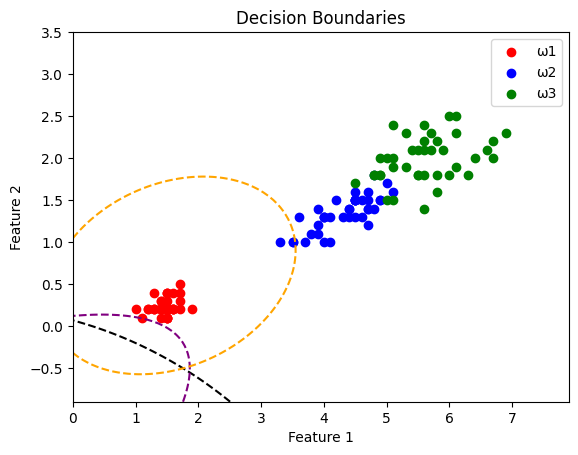

In [16]:
import numpy as np
import matplotlib.pyplot as plt

omega1 = X_train[y_train == 0]
omega2 = X_train[y_train == 1]
omega3 = X_train[y_train == 2]


# Step 1: Compute mean vectors and covariance matrices for all classes
mean_omega1 = np.mean(omega1, axis=0)
mean_omega2 = np.mean(omega2, axis=0)
mean_omega3 = np.mean(omega3, axis=0)

cov_omega1 = np.cov(omega1, rowvar=False, bias=False)
cov_omega2 = np.cov(omega2, rowvar=False, bias=False)
cov_omega3 = np.cov(omega3, rowvar=False, bias=False)

# Step 2: Calculate decision boundary parameters
inv_cov_omega1 = np.linalg.inv(cov_omega1)
inv_cov_omega2 = np.linalg.inv(cov_omega2)
inv_cov_omega3 = np.linalg.inv(cov_omega3)

# Coefficients for quadratic decision boundary: ax^2 + by^2 + cxy + dx + ey + f = 0
a = -0.5 * (inv_cov_omega1[0, 0] - inv_cov_omega2[0, 0])
b = -0.5 * (inv_cov_omega1[1, 1] - inv_cov_omega2[1, 1])
c = -0.5* ((inv_cov_omega1[0, 1] + inv_cov_omega1[1 , 0])- inv_cov_omega2[0, 1] - inv_cov_omega2[1, 0])
d = (mean_omega1[0] * inv_cov_omega1[0, 0] + mean_omega1[1]*inv_cov_omega1[0,1]) - (mean_omega2[0] * inv_cov_omega2[0, 0] - mean_omega2[1] * inv_cov_omega2[1, 0])
e = (mean_omega1[1] * inv_cov_omega1[1, 1] +mean_omega1[0]*inv_cov_omega1[1,0]) - (mean_omega2[1] * inv_cov_omega2[1, 1] - mean_omega2[0] * inv_cov_omega2[0, 1])
f = 0.5 * (np.dot(mean_omega2, np.dot(inv_cov_omega2, mean_omega2)) - np.dot(mean_omega1, np.dot(inv_cov_omega1, mean_omega1))) - 0.5 * np.log(np.linalg.det(cov_omega1) / np.linalg.det(cov_omega2))

a_omega3 = -0.5 * (inv_cov_omega3[0, 0] - inv_cov_omega1[0, 0])
b_omega3 = -0.5 * (inv_cov_omega3[1, 1] - inv_cov_omega1[1, 1])
c_omega3 = -0.5 * ((inv_cov_omega3[0, 1] + inv_cov_omega3[1, 0]) - (inv_cov_omega1[0, 1] + inv_cov_omega1[1, 0]))
d_omega3 = (mean_omega3[0] * inv_cov_omega3[0, 0] + mean_omega3[1] * inv_cov_omega3[0, 1]) - (mean_omega1[0] * inv_cov_omega1[0, 0] - mean_omega1[1] * inv_cov_omega1[1, 0])
e_omega3 = (mean_omega3[1] * inv_cov_omega3[1, 1] + mean_omega3[0] * inv_cov_omega3[1, 0]) - (mean_omega1[1] * inv_cov_omega1[1, 1] - mean_omega1[0] * inv_cov_omega1[1, 0])
f_omega3 = 0.5 * (np.dot(mean_omega1, np.dot(inv_cov_omega1, mean_omega1)) - np.dot(mean_omega3, np.dot(inv_cov_omega3, mean_omega3))) - 0.5 * np.log(np.linalg.det(cov_omega1) / np.linalg.det(cov_omega3))

# ... (previous code remains the same)

# Calculate decision boundary parameters between omega2 and omega3
a_omega2_omega3 = -0.5 * (inv_cov_omega2[0, 0] - inv_cov_omega3[0, 0])
b_omega2_omega3 = -0.5 * (inv_cov_omega2[1, 1] - inv_cov_omega3[1, 1])
c_omega2_omega3 = -0.5 * ((inv_cov_omega2[0, 1] + inv_cov_omega2[1, 0]) - (inv_cov_omega3[0, 1] + inv_cov_omega3[1, 0]))
d_omega2_omega3 = (mean_omega2[0] * inv_cov_omega2[0, 0] + mean_omega2[1] * inv_cov_omega2[0, 1]) - (mean_omega3[0] * inv_cov_omega3[0, 0] - mean_omega3[1] * inv_cov_omega3[1, 0])
e_omega2_omega3 = (mean_omega2[1] * inv_cov_omega2[1, 1] + mean_omega2[0] * inv_cov_omega2[1, 0]) - (mean_omega3[1] * inv_cov_omega3[1, 1] - mean_omega3[0] * inv_cov_omega3[0, 1])
f_omega2_omega3 = 0.5 * (np.dot(mean_omega3, np.dot(inv_cov_omega3, mean_omega3)) - np.dot(mean_omega2, np.dot(inv_cov_omega2, mean_omega2))) - 0.5 * np.log(np.linalg.det(cov_omega2) / np.linalg.det(cov_omega3))

# ... (rest of the code remains the same)


# Generate mesh grid
x_min, x_max = min(omega1[:, 0].min(), omega2[:, 0].min(), omega3[:, 0].min()) - 1, max(omega1[:, 0].max(), omega2[:, 0].max(), omega3[:, 0].max()) + 1
y_min, y_max = min(omega1[:, 1].min(), omega2[:, 1].min(), omega3[:, 1].min()) - 1, max(omega1[:, 1].max(), omega2[:, 1].max(), omega3[:, 1].max()) + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Compute decision boundaries
zz_omega1 = a*xx**2 + b*yy**2 + c*xx*yy + d*xx + e*yy + f
zz_omega2_omega3 = a_omega2_omega3*xx**2 + b_omega2_omega3*yy**2 + c_omega2_omega3*xx*yy + d_omega2_omega3*xx + e_omega2_omega3*yy + f_omega2_omega3
zz_omega3 = a_omega3*xx**2 + b_omega3*yy**2 + c_omega3*xx*yy + d_omega3*xx + e_omega3*yy + f_omega3


# Plot data points and decision boundaries
plt.scatter(omega1[:, 0], omega1[:, 1], color='red', label='ω1')
plt.scatter(omega2[:, 0], omega2[:, 1], color='blue', label='ω2')
plt.scatter(omega3[:, 0], omega3[:, 1], color='green', label='ω3')

# Plot decision boundaries
plt.contour(xx, yy, zz_omega1, levels=[0], colors='black', linestyles='dashed')
plt.contour(xx, yy, zz_omega2_omega3, levels=[0], colors='purple', linestyles='dashed')
plt.contour(xx, yy, zz_omega3, levels=[0], colors='orange', linestyles='dashed')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundaries')
plt.show()
